# DS - 002 - Learning Project:  Gradient Boosting Algorithm

On this notebook, you will see an example of how to implement from scratch the Gradient Boosting Algorithm. Keep in mind that this algorithm is behind many libraries like XGBoost.

Check out my article on **Medium** where I give more detail about it!<br>

### 1. Creating a sample data

Importing Python Libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Generating Sample Data with a exponential function

In [ ]:
def generate_sample_data(f, first, last, size=100):
  x_arr = []
  y_arr = []
  for _ in range(size):
    x = random.random()*(last-first)
    y = f(x)
    x_arr.append(x)
    y_arr.append(y)

  return x_arr,y_arr

# Based on a function we could designed we call the generate_sample_data method
mu, sigma = 1, 0.2
f = lambda x: np.log(np.sqrt(x)) + np.random.normal(mu, sigma)

data_size = 200

x,y = generate_sample_data(f, 0, 2, size=data_size)

#Creating the dataset for the explanation
dataset = pd.DataFrame({"x":np.array(x),"y":np.array(y)}).sort_values(by='x')
dataset.head()

x = np.array(dataset['x'])
y = np.array(dataset['y'])

x = x.reshape(-1,1)

Let's display the current dataset

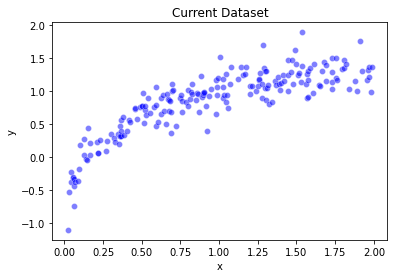

In [ ]:
ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="blue", alpha=0.5)

_ = ax.set_title("Current Dataset")

### 2. Simulating the Gradient Boosting Algorithm

**Step 1**: Let's start our algorithm by creating a function `F0` that actually is the mean of the target

In [ ]:
F0 = np.full((data_size,1),y.mean())

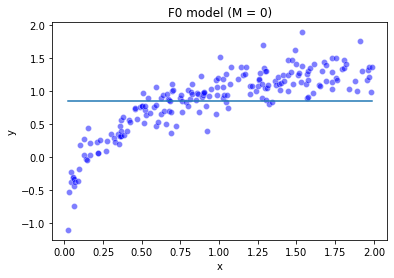

In [ ]:
ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="blue", alpha=0.5)
ax.plot(x,F0)
_ = ax.set_title("F0 model (M = 0)")

Now, let's suppose to add a new function that could be better. Based on the algorithm, we start to create a decision tree that would be trained using the residual error of the previous F0 function as target.<br>

By the way, we do not forget about the **learning rate** to avoid possible overfitting problems.

In [ ]:
learning_rate = 0.5

In [ ]:
F0 = y.mean()
treeModel_0 = DecisionTreeRegressor(max_depth = 1)
treeModel_0.fit(x,y-F0)
H0 = learning_rate*treeModel_0.predict(x)
F1 = F0 + H0

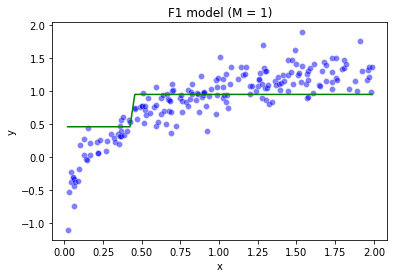

In [ ]:
ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="blue", alpha=0.5)
ax.plot(x,F1,color="green")
_ = ax.set_title("F1 model (M = 1)")

Mmm, interesting, let's make a new model based on F1.

In [ ]:
treeModel_1 = DecisionTreeRegressor(max_depth = 1)
treeModel_1.fit(x,y-F1)
H1 = learning_rate*treeModel_1.predict(x)
F2 = F1 + H1

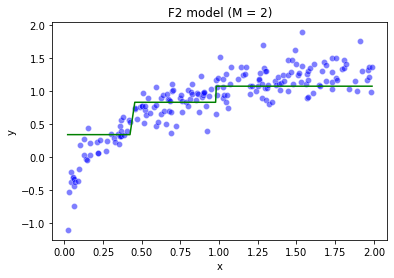

In [ ]:
ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="blue", alpha=0.5)
ax.plot(x,F2,color="green")
_ = ax.set_title("F2 model (M = 2)")

So we see that its changing the function based on the decision tree and it's trying to fit the dataset. Now, we can make a loop that repeat the process N times.

In [76]:
def gradient_boosting_algorithm(times,learning_rate):

  F0 = y.mean()
  Fm = F0
  trees = []
  row = 1
  column = 1
  #Creating an array where we can store each F function per step
  F_array = []
  F_array.append(np.full((data_size,1),F0))

  for i in range(times):
    treeModel = DecisionTreeRegressor(max_depth = 1)
    treeModel.fit(x,y-Fm)
    Fm += learning_rate*treeModel.predict(x)
    F_array.append(np.copy(Fm))

  return F_array

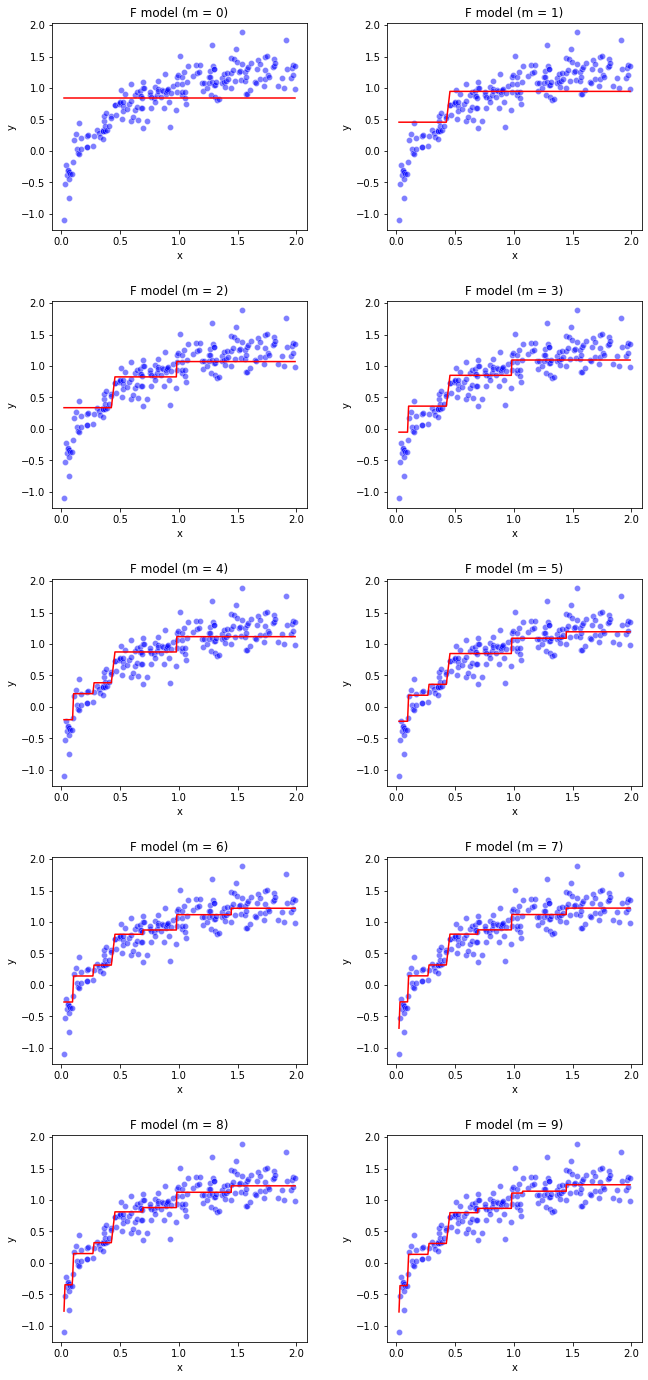

In [77]:
M = 10
F_array = gradient_boosting_algorithm(times = M, learning_rate = 0.5)
N_columns = 2
N_rows = int(M/N_columns)
idx = 0

#Ploting each loop regression model (Fm)
fig, ax = plt.subplots(nrows=N_rows, ncols=N_columns, figsize=(10,20))
fig.tight_layout(pad=5.0)
for i in range(N_rows):
  for j in range(N_columns):
    sns.scatterplot(data=dataset, x="x", y="y", color="blue", alpha=0.5,ax=ax[i][j])
    ax[i][j].plot(x,F_array[idx],color="red")
    ax[i][j].set_title(f"F model (m = {idx})")
    idx+=1

plt.show()

Nice! So that's gradient boosting doing in practice 😲

### 3. Creating a Gradient Boosting Class

Let's create a class that simulates this algorithm. All the credits to Matt Bowers for the article ... amazing!!

Check out his article here: <br>https://blog.mattbowers.dev/gradient-boosting-machine-from-scratch#Implementation

In [ ]:
class GradientBoostingClass():

  def __init__(self, numTrees, numLearningRate, numMaxDepth):
    self.numTrees = numTrees;
    self.numLearningRate = numLearningRate;
    self.numMaxDepth = numMaxDepth

  def fit(self, x, y):
    max_depth = self.numMaxDepth
    self.F0 = y.mean()
    Fm = self.F0
    self.treeArray = []
    for _ in range(self.numTrees):
      decisionTreeModel = DecisionTreeRegressor(max_depth = max_depth)
      decisionTreeModel.fit(x,y-Fm)
      Fm += self.numLearningRate*decisionTreeModel.predict(x)
      self.treeArray.append(decisionTreeModel)

  def predict(self,x):
    return self.F0 + self.numLearningRate*np.sum([tree.predict(x) for tree in self.treeArray],axis=0)

In [ ]:
gradientBoostingObject = GradientBoostingClass(numTrees = 10, numLearningRate = 0.5, numMaxDepth = 1)
gradientBoostingObject.fit(x,y)

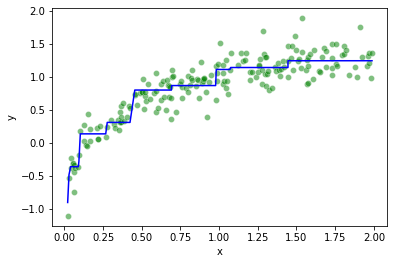

In [ ]:
ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="green", alpha=0.5)
ax.plot(x, gradientBoostingObject.predict(x), color="blue")

### 4. Comparing Sklearn Gradient Boosting vs our Gradient Boosting Class

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

#Creating the Gradient Boosting Regressor with Sklearn Library
sklearn_gbm = GradientBoostingRegressor(n_estimators =25, learning_rate=0.3, max_depth=1)
sklearn_gbm.fit(x,y)

#Creating the Gradient Boosting with our class
our_gbm = GradientBoostingClass(numTrees=25, numLearningRate=0.3, numMaxDepth = 1)
our_gbm.fit(x,y)

mean_squared_error(y, sklearn_gbm.predict(x)), mean_squared_error(y, our_gbm.predict(x))

(0.02903685845080934, 0.02903685845080933)

This metric is very similar with the official Sklearn library!